In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression

In [10]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Deep Learning/統計的機械学習　演習/data/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 単回帰

In [47]:
df = pd.read_csv(path + '1.01. Simple linear regression.csv')
df.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [22]:
x = df['SAT']
y = df['GPA']
x_matrix = x.values.reshape(-1,1)

In [32]:
reg = LinearRegression()
reg.fit(x_matrix, y)

LinearRegression()

In [34]:
#決定係数
reg.score(x_matrix, y)


array([0.00165569])

In [ ]:
#係数
reg.coef_

In [35]:
#切片
reg.intercept_

0.2750402996602799

In [37]:
#予測
reg.predict([[1740]])


array([3.15593751])

In [44]:
new_data = pd.DataFrame(data=[1740, 1760], columns=['SAT'])
new_data
reg.predict(new_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([3.15593751, 3.18905127])

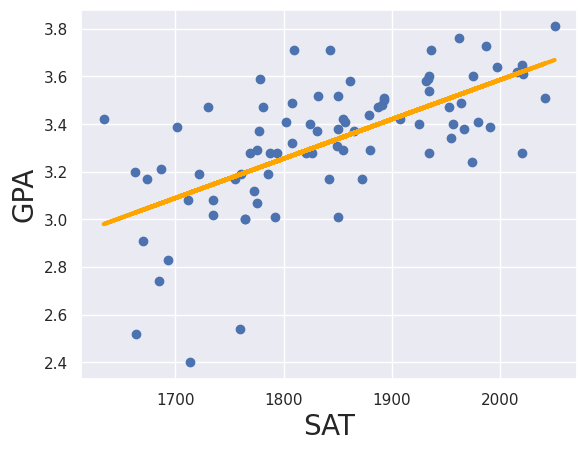

In [46]:
plt.scatter(x, y)
plt.xlabel('SAT', fontsize=20)
plt.ylabel('GPA', fontsize=20)
yhat = reg.coef_*x_matrix + reg.intercept_
fig = plt.plot(x, yhat, lw=3, c='orange', label='regression line')
plt.show()

# 重回帰分析

In [50]:
data = pd.read_csv(path + '1.02. Multiple linear regression.csv')
data.describe()

,SAT,GPA,"Rand 1,2,3"
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,2.059524
std,104.530661,0.271617,0.855192
min,1634.000000,2.400000,1.000000
25%,1772.000000,3.190000,1.000000
50%,1846.000000,3.380000,2.000000
75%,1934.000000,3.502500,3.000000
max,2050.000000,3.810000,3.000000


In [52]:
x= data[['SAT', 'Rand 1,2,3']]
y = data['GPA']
reg = LinearRegression()
reg.fit(x, y)

LinearRegression()

In [55]:
reg.coef_

array([ 0.00165354, -0.00826982])

In [56]:
reg.intercept_

0.29603261264909486

calculating the R-squared

In [57]:
r2 = reg.score(x,y)
n = x.shape[0]
p = x.shape[1]

adjusted_r2 = 1 - (1-r2)*(n -1)/ (n - p -1)
adjusted_r2

0.3920313482513401